<a href="https://colab.research.google.com/github/Rayley001/Rayley001/blob/main/GroupProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group Project: Bike Buyers
By Liliane Effoudou, Michael Mamish, Leika Joseph

###1.Introduction:
  This is the Bike Buyers dataset. It is sourced from Kaggle and observed 1000 subjects to determine whether they would like to buy a bike based on their needs, occupations, the distance of their commute, the region in which they live in, their age, income, gender, marital status, if they  have children, and their education levels.

  We would like to know what are some of the factors that heavily influence a person's need to buy a bike. Since the subjects are taken internationally and the dataset analyzes several factors, we can see if we can connect a relationship between different variables.

####2.Wrangle data using numpy, panda, seaborn, and matplotlib:

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/LilianeEff/Data201/refs/heads/main/bike_buyers.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


###3. Use EDA Principles to visualize the data:

In [ ]:
df.shape  #we have 1000 rows and 13 columns.

(1000, 13)

In [ ]:
df.head(10) #top ten rows, gives us an idea about the variables that would affect a need for a bike.
#we see there are some missing values, which may skew our data a bit.

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [ ]:
#First let's clean up the data by removing any missing values
df = df.dropna()
df.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
10,22173,Married,Female,30000.0,3.0,High School,Skilled Manual,No,2.0,1-2 Miles,Pacific,54.0,Yes
11,12697,Single,Female,90000.0,0.0,Bachelors,Professional,No,4.0,10+ Miles,Pacific,36.0,No
13,25323,Married,Male,40000.0,2.0,Partial College,Clerical,Yes,1.0,1-2 Miles,Europe,35.0,Yes
14,23542,Single,Male,60000.0,1.0,Partial College,Skilled Manual,No,1.0,0-1 Miles,Pacific,45.0,Yes


In [ ]:
#now let's analyze the summary statistics:
df.describe()

,ID,Income,Children,Cars,Age
count,952.000000,952.000000,952.000000,952.000000,952.000000
mean,19979.940126,55903.361345,1.898109,1.452731,44.256303
std,5334.000279,30845.483596,1.620426,1.111962,11.428167
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15310.250000,30000.000000,0.000000,1.000000,35.000000
50%,19747.500000,60000.000000,2.000000,1.000000,43.000000
75%,24531.500000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


4. Use graphs to answer your questions.

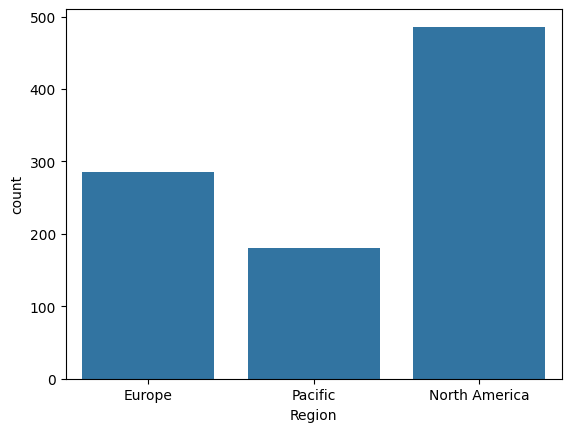

In [ ]:
# This show us wich region most people are from.
sns.countplot(x= "Region", data=df)
plt.show()

North America is the most common region represented in the dataset.

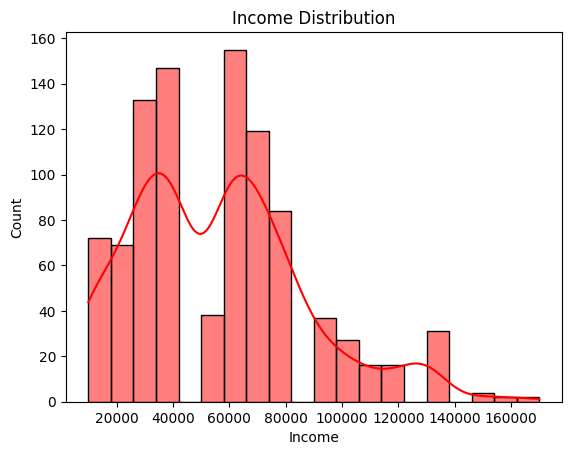

In [ ]:
sns.histplot(x="Income", data=df, color="red", kde=True)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


This shows us the distribution of income, so we can determine if income plays a role in bike purchases.
The histogram only shows us a bimodal distribution of wealth taken from the sample, with most people making around 40000 and 65-70000, it skews right with outliers in the 160000's.

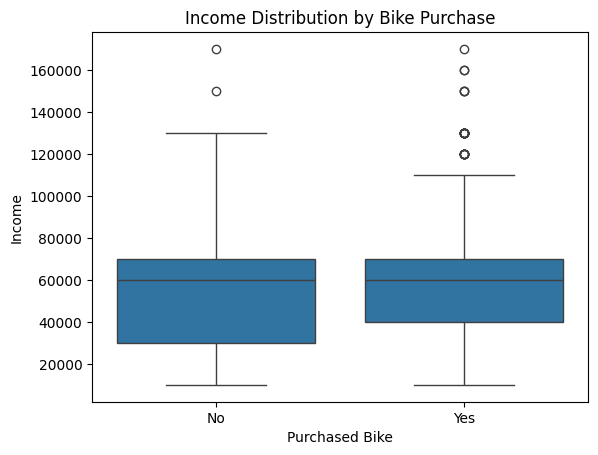

In [ ]:
sns.boxplot(x="Purchased Bike", y="Income", data=df)
plt.xlabel("Purchased Bike")
plt.ylabel("Income")
plt.title("Income Distribution by Bike Purchase")
plt.show()

We may conclude from this plot that people's income does not appear to be a reliable indicator of whether they would buy a bike. Other factors may play a more significant role in influencing bike purchases.

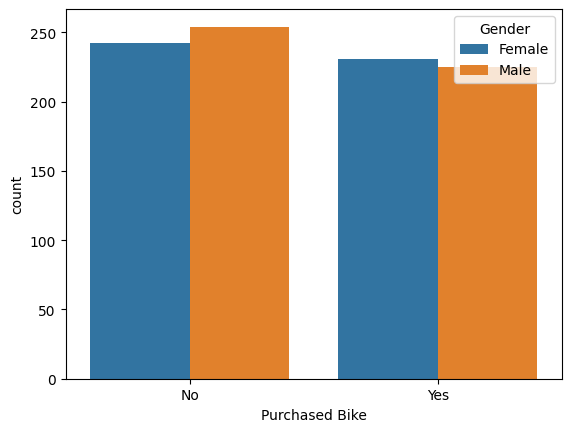

In [ ]:
sns.countplot(x = "Purchased Bike",
              data = df,
              hue = "Gender")
plt.show()

More males than females have purchased bikes, but the difference is not too significant. Just like income, this does not seem to be a factor.

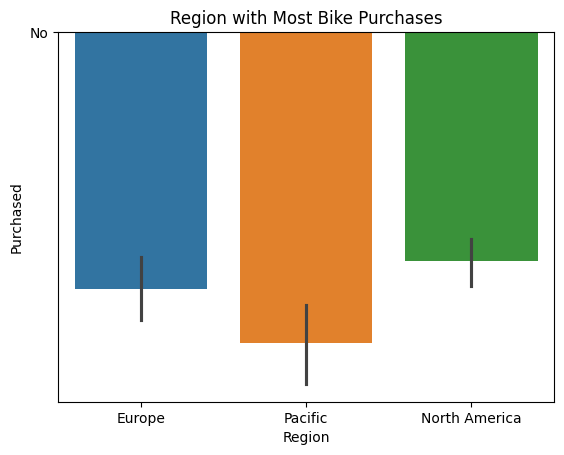

In [ ]:
sns.barplot(x='Region', y='Purchased Bike', data= df, hue='Region')
plt.xlabel('Region')
plt.ylabel('Purchased')
plt.title('Region with Most Bike Purchases')
plt.show()


The pacific region leads in number of bikes purchased overall.

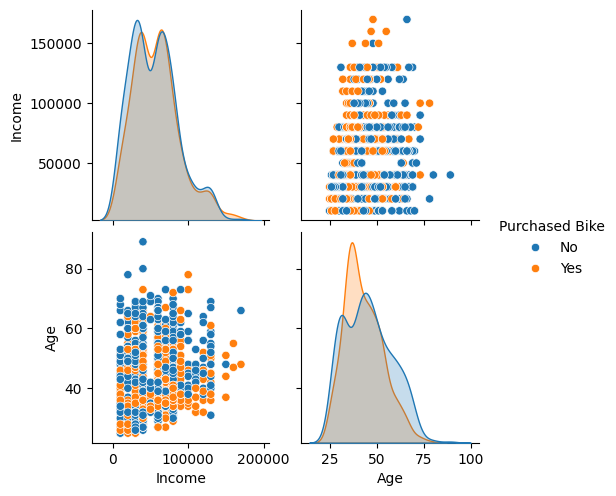

In [ ]:
sns.pairplot(df[['Income', 'Region', 'Age', 'Commute Distance', 'Purchased Bike']], hue='Purchased Bike')
plt.show()

Age is a factor when it comes to income, but income is not a great indicator for anyone wanting to buy a bike. Age however is an indicator for a bike purchase.

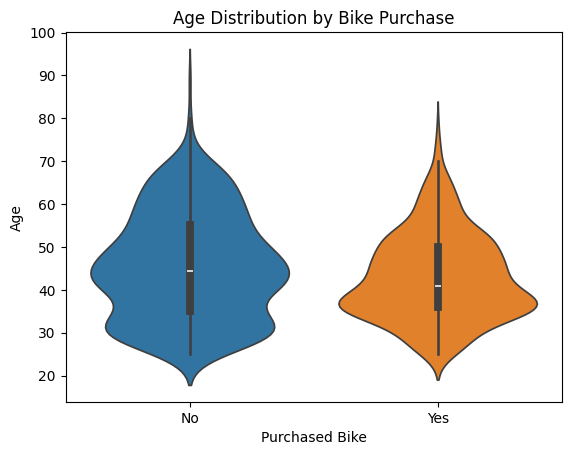

In [ ]:
sns.violinplot(x='Purchased Bike', y='Age', data=df, hue='Purchased Bike')
plt.xlabel('Purchased Bike')
plt.ylabel('Age')
plt.title('Age Distribution by Bike Purchase')
plt.show()


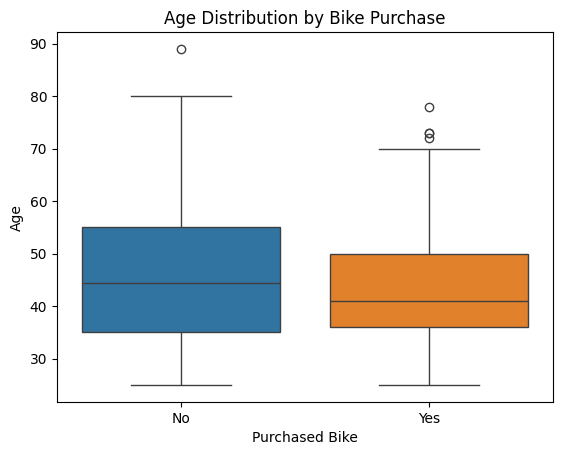

In [ ]:
sns.boxplot(x='Purchased Bike', y='Age', data=df, hue='Purchased Bike')
plt.xlabel('Purchased Bike')
plt.ylabel('Age')
plt.title('Age Distribution by Bike Purchase')
plt.show()

From this box and violin plots we can see that the most people who purchased bikes are in their mid-thirties and are also in their late forties to early fifties with a few outliers.

5 and 6. Simulate a non-parametric inference of a median of a quantitative variable with 10% of the data.

In [ ]:
np.random.seed(42)
bike_buyers_data = pd.DataFrame({
    'Age': np.random.randint(18, 70, 1000)  # Ages between 18 and 70
})

n_bootstrap_samples = 1000
sample_size = 100

bootstrap_medians = []

for _ in range(n_bootstrap_samples):
    sample = bike_buyers_data['Age'].sample(n=sample_size, replace=True)
    bootstrap_medians.append(sample.median())

bootstrap_medians = np.array(bootstrap_medians)

conf_interval = np.percentile(bootstrap_medians, [2.5, 97.5])
median_estimate = np.median(bootstrap_medians)

median_estimate, conf_interval


(44.0, array([40., 49.]))

Median age is 44 years old, and the confidence interval falls between 40 to 49 years old.

From this dataset we can conclude that the biggest factor that is affecting a bike purchase internationally has to do with one's age. The majority of buyers fall between their mid and late thirties to  their mid forties.Maybe the buyers need the bikes to move around for their commute needs depending on where they live in the world(the pacific region being the one with the most bike purchase), or maybe they need it for their lifestyle. We can rule out that their reason for purchasing bikes is because they're rich since income was not related to the purchases.